In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('co2-emission-intensity-6.csv')
df.columns

Index(['Date:year', 'Member State:text', 'index:number',
       'Indicative level - high:number', 'Indicative level - low:number'],
      dtype='object')

In [3]:
df.columns = ['Year', 'Country', 'Co2 (g/kwh)', 'Low_consumption_EV_per_km', 'High_consumption_EV_per_km']

In [4]:
low_consumption_EV = 0.16
high_consumption_EV = 0.192
km_per_year = 12000

In [5]:
df['Low_consumption_EV_per_km'] = df.apply (lambda row: row['Co2 (g/kwh)']*low_consumption_EV, axis=1)
df['High_consumption_EV_per_km'] = df.apply (lambda row: row['Co2 (g/kwh)']*high_consumption_EV, axis=1)
#df['Low_consumption_EV_10_years (kg)'] = df.apply (lambda row: row['Co2 (g/kwh)']*low_consumption_EV*km_per_year*10/1000, axis=1)
#df['High_consumption_EV_10_years (kg)'] = df.apply (lambda row: row['Co2 (g/kwh)']*high_consumption_EV*km_per_year*10/1000, axis=1)



In [6]:
df_2019 = df[df['Year']== 2019]

In [7]:
df_2000 = df[df['Year']== 2000]

In [8]:
df_2000

,Year,Country,Co2 (g/kwh),Low_consumption_EV_per_km,High_consumption_EV_per_km
10,2000,Austria,158.0,25.28,30.336
40,2000,Belgium,270.0,43.20,51.840
70,2000,Bulgaria,476.0,76.16,91.392
100,2000,Croatia,292.0,46.72,56.064
130,2000,Cyprus,849.0,135.84,163.008
160,2000,Czechia,688.0,110.08,132.096
190,2000,Denmark,479.0,76.64,91.968
220,2000,Estonia,1116.0,178.56,214.272
250,2000,European Union - 27 countries (from 2020),399.0,63.84,76.608
282,2000,European Union - 28 countries (2013-2020),411.0,65.76,78.912


In [9]:
EU_countries = ["Austria",
"Belgium",
"Bulgaria",
#"Cyprus",
#"Czechia",
"Germany",
"Denmark",         
"Estonia",           
"Spain",
"Finland",
"France",
"United Kingdom",                
"Greece",
"Croatia",
"Hungary",
"Ireland", 
"Iceland",
"Italy",
"Lithuania",
"Luxembourg",
"Latvia",
"Malta",
"Netherlands",
"Norway",
"Poland",
"Portugal",
"Romania",
"Sweden",
"Slovenia",                
"Slovakia"]
#"Switzerland"]

In [10]:
df_all_cars = pd.read_csv('average_co2_per_km.csv').dropna()
df_all_cars

,Country,Enedc (g/km),Ewltp (g/km)
0,AT,125.455194,154.674660
1,BE,121.531288,145.833169
2,BG,137.896427,157.404069
5,DE,131.344614,156.729497
6,DK,111.904083,135.881014
7,EE,130.082635,157.020441
8,ES,121.327633,147.407334
9,FI,115.321588,138.891883
10,FR,113.764009,139.282486
11,GB,127.692072,152.805123


In [11]:
df_all_cars['Country'] = EU_countries

In [12]:
df_all_cars = df_all_cars.sort_values(by=['Country'])

In [13]:
df_2019_final = pd.merge(df_2019, df_all_cars, how="inner", on=["Country"])

In [14]:
df_2019_final['High_consumption_EV_per_km'].mean()

47.63733333333334

87 kg/kWh (Regett et al. 2018) -> for a 52 kwh battery -> 4524 kg of Co2 for battery production (IVL 2018). Assuming that a for the production of a conventional car 0 Co2 emissions are emitted (for simplicity)

Battery_prod_co2 + km * ev_co2 - km * car_co2 = 0 

km = Battery_prod_co2 / (car_co2 - ev_co2)

Co2 emission from recycling, Co2 from manufacturing, upload the code on github, weighted average

In [15]:
df_2019_final['Km_to_repay_high_NEDC'] = df_2019_final.apply (lambda row: round(1000*4524 / (row['Enedc (g/km)'] -row['High_consumption_EV_per_km'])), axis=1)
df_2019_final['Km_to_repay_low_NEDC'] = df_2019_final.apply (lambda row: round(1000*4524 / (row['Enedc (g/km)'] -row['Low_consumption_EV_per_km'])), axis=1)
df_2019_final['Km_to_repay_high_WLTP'] = df_2019_final.apply (lambda row: round(1000*4524 / (row['Ewltp (g/km)'] -row['High_consumption_EV_per_km'])), axis=1)
df_2019_final['Km_to_repay_low_WLTP'] = df_2019_final.apply (lambda row: round(1000*4524 / (row['Ewltp (g/km)'] -row['Low_consumption_EV_per_km'])), axis=1)

In [16]:
df_co2 = df_2019_final.sort_values(by = ['Co2 (g/kwh)'])

In [17]:
df_final = pd.merge(df_2019_final, df_2000, how="inner", on=["Country"])
df_final

,Year_x,Country,Co2 (g/kwh)_x,Low_consumption_EV_per_km_x,High_consumption_EV_per_km_x,Enedc (g/km),Ewltp (g/km),Km_to_repay_high_NEDC,Km_to_repay_low_NEDC,Km_to_repay_high_WLTP,Km_to_repay_low_WLTP,Year_y,Co2 (g/kwh)_y,Low_consumption_EV_per_km_y,High_consumption_EV_per_km_y
0,2019,Austria,91.0,14.56,17.472,125.455194,154.674660,41895,40795,32973,32288,2000,158.0,25.28,30.336
1,2019,Belgium,167.0,26.72,32.064,121.531288,145.833169,50566,47716,39765,37981,2000,270.0,43.20,51.840
2,2019,Bulgaria,421.0,67.36,80.832,137.896427,157.404069,79279,64137,59082,50242,2000,476.0,76.16,91.392
3,2019,Croatia,145.0,23.20,27.840,119.405921,144.413405,49407,47024,38808,37323,2000,292.0,46.72,56.064
4,2019,Denmark,126.0,20.16,24.192,111.904083,135.881014,51578,49311,40505,39094,2000,479.0,76.64,91.968
5,2019,Estonia,891.0,142.56,171.072,130.082635,157.020441,-110370,-362577,-321957,312854,2000,1116.0,178.56,214.272
6,2019,Finland,86.0,13.76,16.512,115.321588,138.891883,45785,44544,36967,36154,2000,164.0,26.24,31.488
7,2019,France,52.0,8.32,9.984,113.764009,139.282486,43592,42904,34989,34544,2000,92.0,14.72,17.664
8,2019,Germany,338.0,54.08,64.896,131.344614,156.729497,68083,58552,49263,44072,2000,559.0,89.44,107.328
9,2019,Greece,598.0,95.68,114.816,115.602784,138.178536,5749987,227077,193643,106451,2000,975.0,156.00,187.200


In [18]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


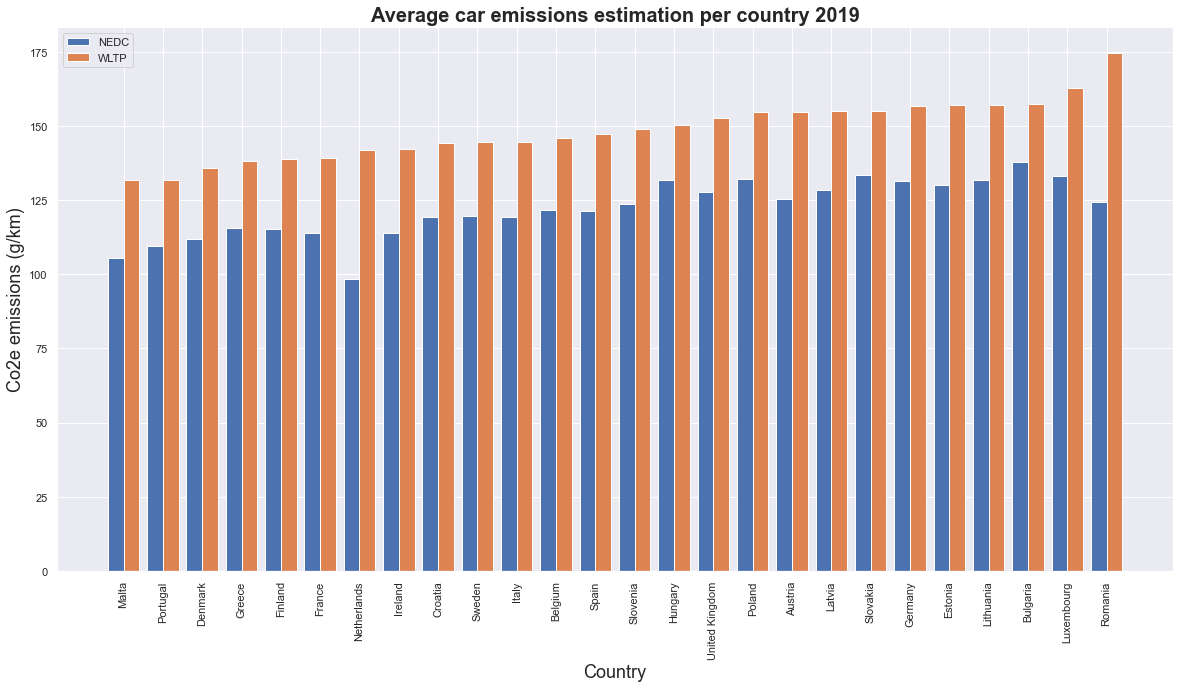

In [23]:
sns.set()
# Usage example:
df_final_no = df_final[df_final['Country'] != 'Norway'].sort_values(by = ['Ewltp (g/km)'])
data = {
    "NEDC": df_final_no['Enedc (g/km)'],
    "WLTP": df_final_no['Ewltp (g/km)']
    
}

fig, ax = plt.subplots(figsize = (20,10))

bar_plot(ax, data, total_width=0.8, single_width=1.0)

plt.xticks(range(26), df_final_no['Country'], rotation='vertical')
plt.title('Average car emissions estimation per country 2019', fontweight="bold", fontsize =20)

plt.xlabel('Country',  fontsize =18)
plt.ylabel('Co2-eq emissions (g/km)', fontsize =18)
plt.savefig('NEDC_WLTP_2019.jpg')

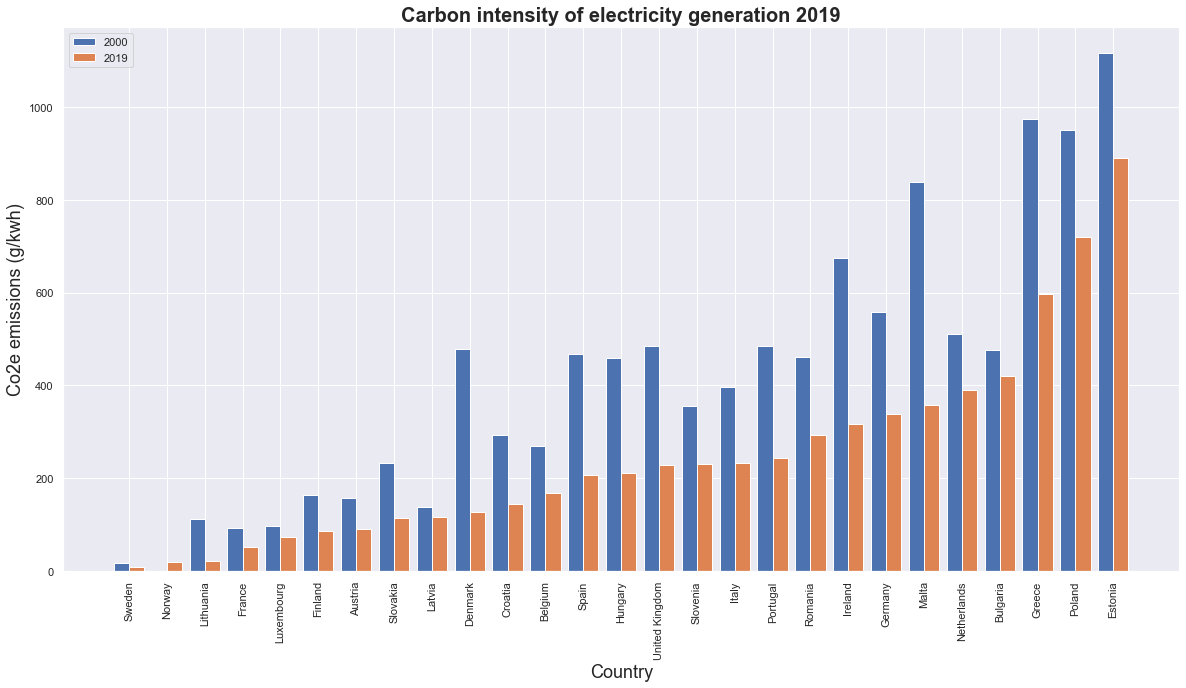

In [24]:
# Usage example:

df_final = df_final.sort_values(by = ['Co2 (g/kwh)_x'])
data = {
    "2000": df_final['Co2 (g/kwh)_y'],
    "2019": df_final['Co2 (g/kwh)_x']
    
}
fig, ax = plt.subplots(figsize = (20,10))

bar_plot(ax, data, total_width=0.8, single_width=1.0)

plt.xticks(range(27), df_final['Country'], rotation='vertical')
plt.title('Carbon intensity of electricity generation 2019', fontweight="bold", fontsize =20)

plt.xlabel('Country',  fontsize =18)
plt.ylabel('Co2-eq emissions (g/kwh)', fontsize =18)

plt.savefig('electr_2000_2019.jpg')

<BarContainer object of 27 artists>

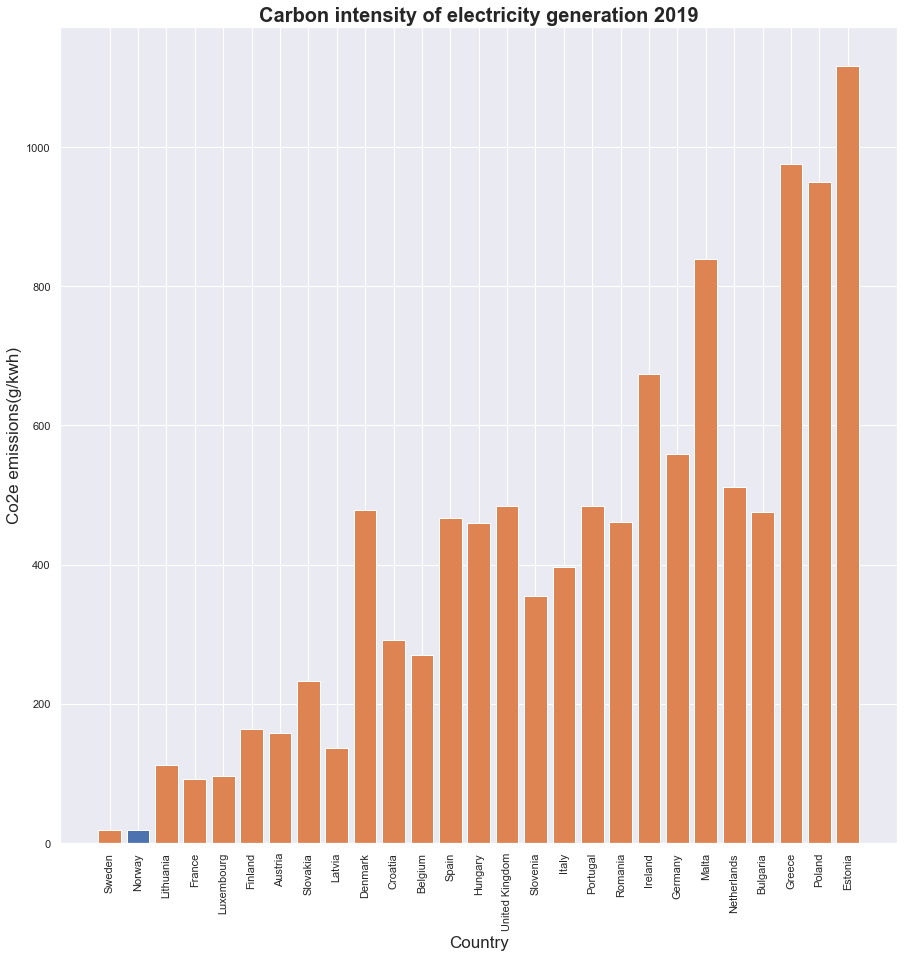

In [21]:
sns.set()
fig, ax = plt.subplots(figsize = (15,15))
plt.title('Carbon intensity of electricity generation 2019', fontweight="bold", fontsize =20)
plt.xticks(rotation = 90)
plt.xlabel('Country',  fontsize =17)
plt.ylabel('Co2e emissions(g/kwh)', fontsize =17)

ax.bar(df_final['Country'], df_final['Co2 (g/kwh)_x'])
ax.bar(df_final['Country'], df_final['Co2 (g/kwh)_y'])